# Section8 前処理

## 欠損値代入

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### それぞれのカラムの欠損値の数の確認

In [4]:
len(df[df['Publisher'].isna()])

58

In [5]:
len(df[df['Year'].isna()])

271

In [6]:
cols = df.columns
for col_name in cols:
    print(f'{col_name}: {len(df[df[col_name].isna()])}')

Rank: 0
Name: 0
Platform: 0
Year: 271
Genre: 0
Publisher: 58
NA_Sales: 0
EU_Sales: 0
JP_Sales: 0
Other_Sales: 0
Global_Sales: 0


### カテゴリカラムの欠損を新たなカテゴリとして扱う

In [7]:
# Publisherが欠損しているレコードのindex
pub_na_idx = df[df['Publisher'].isna()].index
# Yearが欠損しているレコードのindex
year_na_idx = df[df['Year'].isna()].index

In [8]:
# Publisherの欠損をNaNで埋める
df[['Publisher']] = df[['Publisher']].fillna("NaN")

In [9]:
df.iloc[pub_na_idx].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64


In [10]:
# .fillnaに辞書型を渡すことで、複数のカラムを同時に埋めることもの可能
df.fillna({'Publisher' : "NaN", 'Year' : df['Year'].median()}, inplace=True)

In [11]:
df.iloc[year_na_idx].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,2007.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,2007.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,2007.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,2007.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,2007.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [12]:
# Publisherの中には、Unknownのデータも存在している
df[df['Publisher'] == 'Unknown']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
940,942,Gran Turismo Concept 2001 Tokyo,PS2,2001.0,Racing,Unknown,0.00,1.10,0.42,0.33,1.84
1649,1651,NASCAR Thunder 2003,PS2,2007.0,Racing,Unknown,0.60,0.46,0.00,0.16,1.22
2114,2116,Suikoden III,PS2,2007.0,Role-Playing,Unknown,0.29,0.23,0.38,0.08,0.98
2173,2175,Wheel of Fortune,PS2,2007.0,Misc,Unknown,0.47,0.36,0.00,0.12,0.95
2236,2238,Teenage Mutant Ninja Turtles,GBA,2003.0,Action,Unknown,0.67,0.25,0.00,0.02,0.93
...,...,...,...,...,...,...,...,...,...,...,...
16460,16463,"Horse Life 4: My Horse, My Friend, My Champion",3DS,2015.0,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,2007.0,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16532,16535,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01
16545,16548,The Treasures of Mystery Island 3 Pack - Save ...,PC,2011.0,Puzzle,Unknown,0.01,0.00,0.00,0.00,0.01


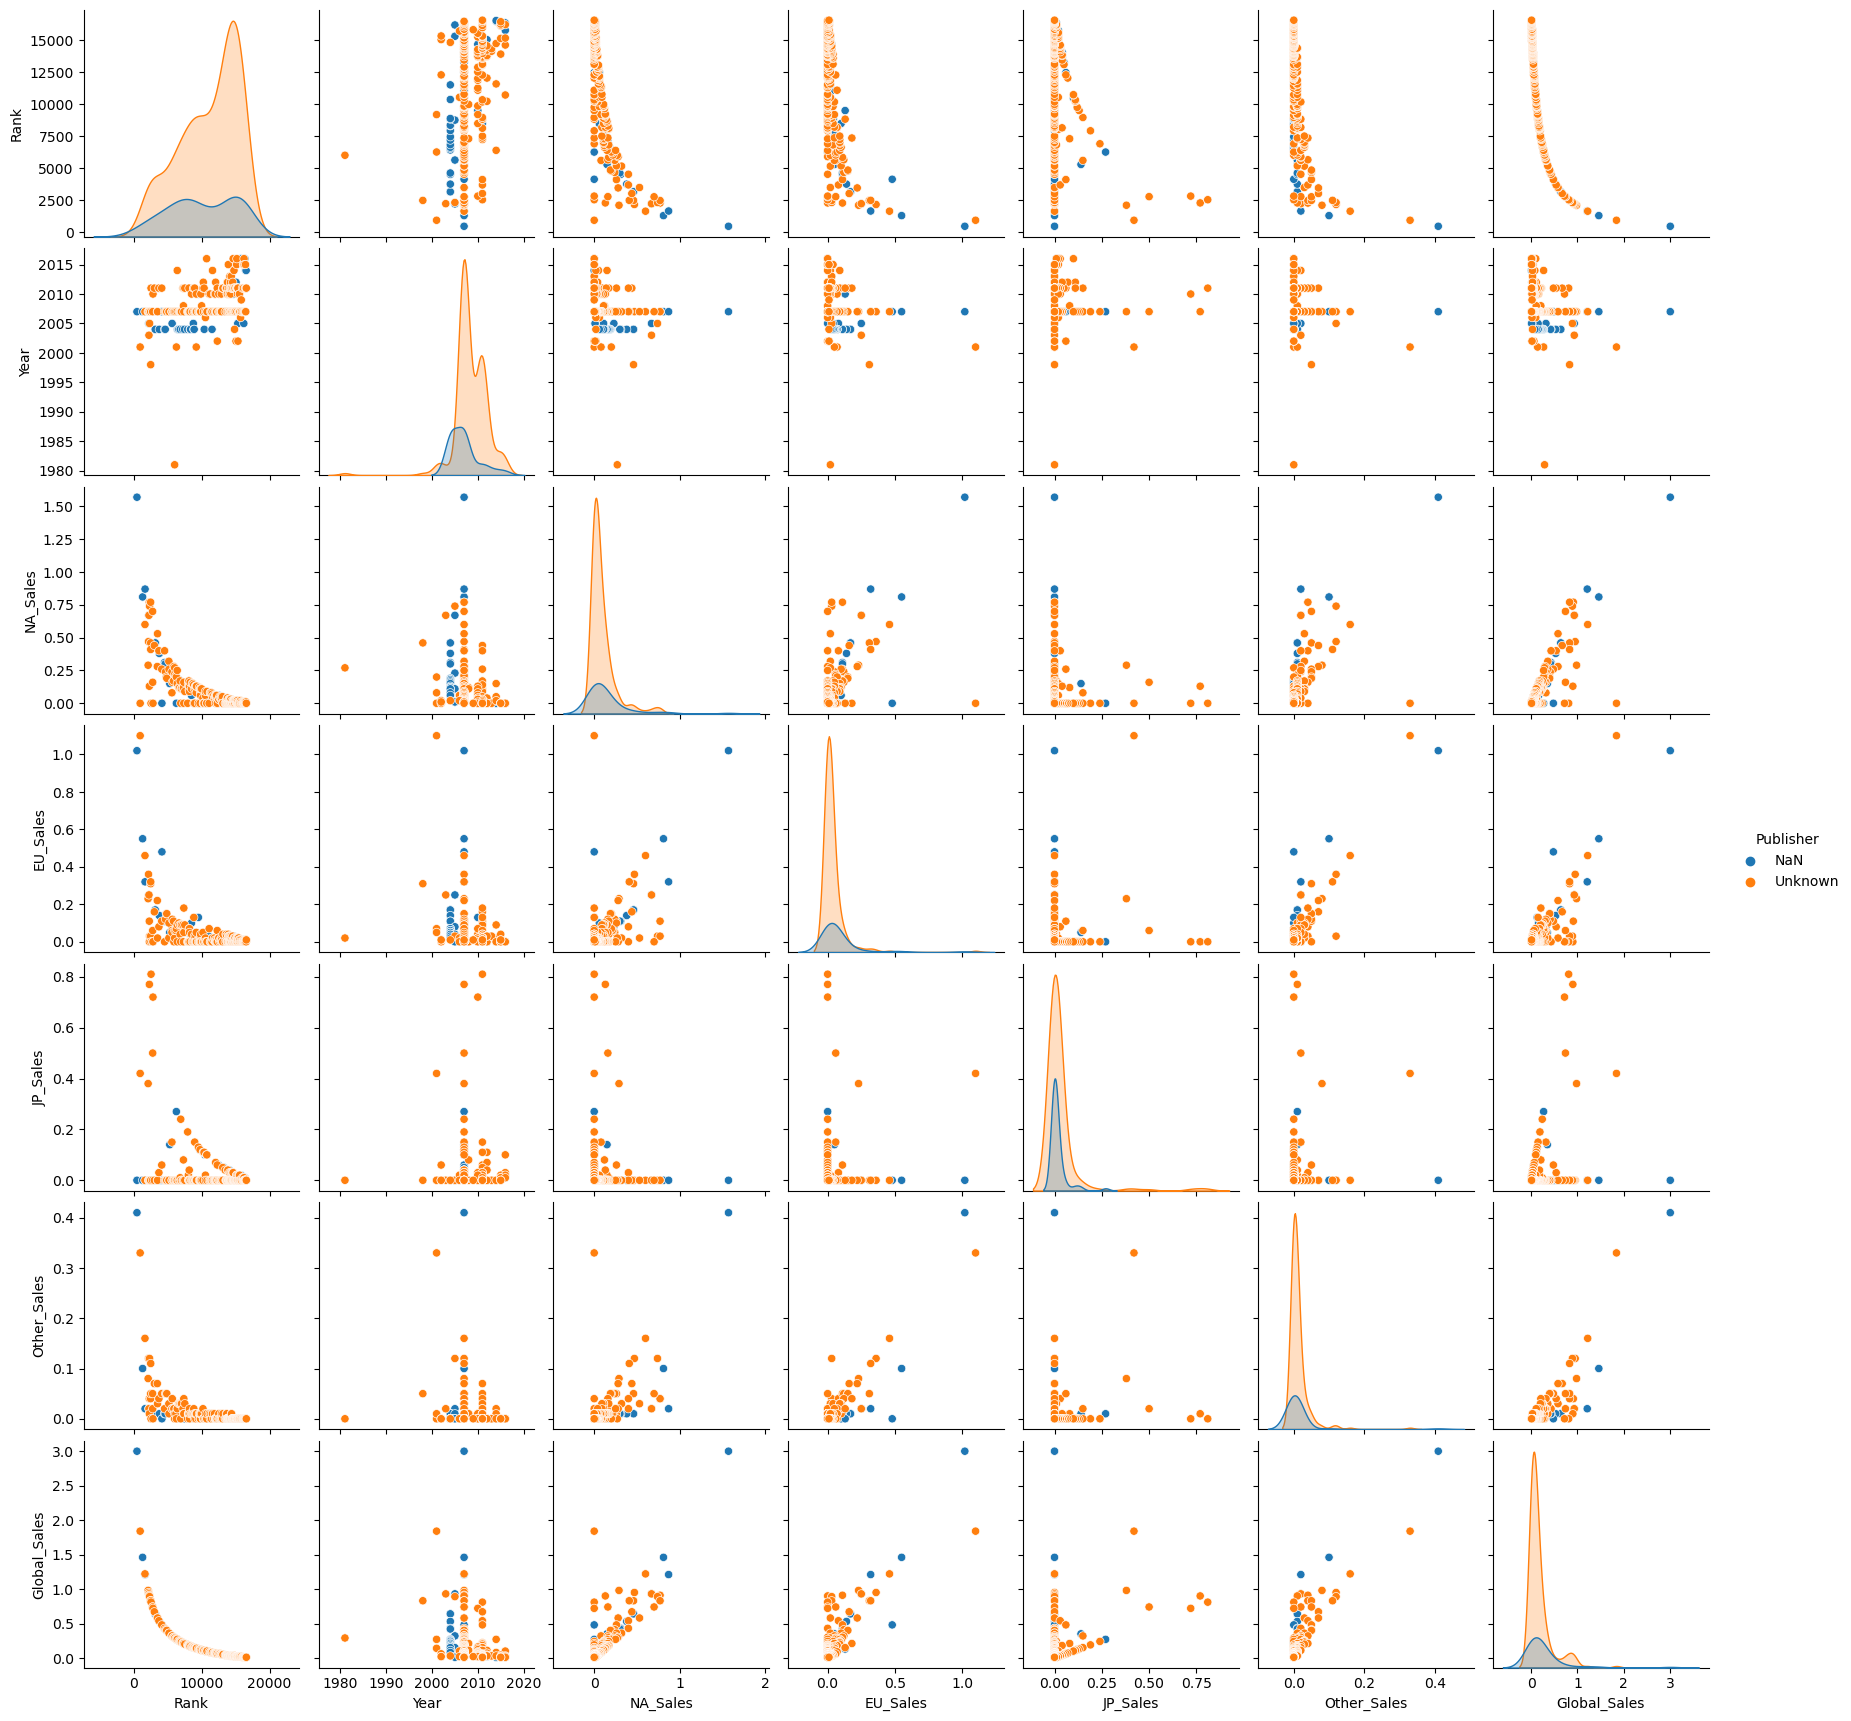

In [13]:
# PublisherのNaNとUnknownのデータの分布の違いを確認する
# これを見ると、Yearのカラムのみ分布が少し違っているのがわかる　->　そのためNaNとUnknownは別のデータとして扱うべき
pub_na_df = df[df['Publisher'] == 'NaN']
pub_unknown_df = df[df['Publisher'] == 'Unknown']
pub_missing_df = pd.concat([pub_na_df, pub_unknown_df])

sns.pairplot(pub_missing_df, hue='Publisher')

### 欠損値に代表値を入れる

In [14]:
# SimpleImputer: sklearnの欠損値を代入するためのクラス
# Yearのカラムの欠損値にYearカラムの中央値を入れる
# Publisherのカラムの欠損値にPublisherカラムの最頻値を入れる
from sklearn.impute import SimpleImputer

df = pd.read_csv('vgsales.csv')

imputer = SimpleImputer(strategy='median')
df['Year'] = imputer.fit_transform(df[['Year']])
imputer = SimpleImputer(strategy='most_frequent')
df['Publisher'] = imputer.fit_transform(df[['Publisher']])

In [15]:
df.iloc[year_na_idx].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,2007.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,2007.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,2007.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,2007.0,Fighting,Electronic Arts,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,2007.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [16]:
df.iloc[pub_na_idx].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,2007.0,Fighting,Electronic Arts,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,2007.0,Sports,Electronic Arts,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,Electronic Arts,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,Electronic Arts,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,Electronic Arts,0.46,0.17,0.0,0.01,0.64


In [17]:
df = pd.read_csv('vgsales.csv')

# Platform別にYearの中央値を計算し、その値で中央値を埋める
# PlatformごとのYearの中央値の辞書
platform_year_dict = df.groupby('Platform')['Year'].median().to_dict()

# 辞書を使って欠損値を埋める。
df['Year'] = df.apply(lambda row: platform_year_dict[row['Platform']] if np.isnan(row['Year']) and row['Platform'] in platform_year_dict else row['Year'], axis=1)

In [18]:
df.iloc[year_na_idx]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,2005.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,2005.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,2009.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,1982.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,2003.0,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,2009.0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,2011.0,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,2003.0,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [19]:
#　モデルを作る際、集計統計量を使って欠損値埋めなどをする際は、学習データのみの集計データを使う
from sklearn.model_selection import train_test_split
df = pd.read_csv('vgsales.csv')
df.drop('Global_Sales', inplace=True, axis=1)

y_col = 'JP_Sales'
X = df.drop(y_col, axis=1)
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# dfに使うのはあくまで学習データなので、ここでは　df　->　X_train　にする
# 学習データで集計したプラットフォームの辞書を学習データにもテストデータにも同様に活用し、欠損値を埋める
platform_year_dict = X_train.groupby('Platform')['Year'].median().to_dict()
X_train['Year'] = X_train.apply(lambda row: platform_year_dict[row['Platform']] if np.isnan(row['Year']) and row['Platform'] in platform_year_dict else row['Year'], axis=1)
X_test['Year'] = X_test.apply(lambda row: platform_year_dict[row['Platform']] if np.isnan(row['Year']) and row['Platform'] in platform_year_dict else row['Year'], axis=1)

## kNNで欠損値代入

kNN
- vgsales.csvの"Year"の欠損値をkNNで予測して埋める
    - sklearn.neighbors.KNeighborsRegressorクラスでkNNを構築する
    - sklearn.impute.KNNImputer(n_neighbors)クラスで欠損値を埋める
- 交差検証(Cross Validation)やhold-outで実施する必要はがあることに注意

###　kNNクラス

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv('vgsales.csv')

# 前処理
df[['Publisher']] = df[['Publisher']].fillna('NaN')
df.drop("Name", axis=1, inplace=True)

# YearカラムをkNNを使って欠損値補完
# X,y生成
target = 'Year'
X = df.drop(target, axis=1)
y = df[target]

# ダミー変数化, 標準化
# 数値変数のためのカラム取得
num_cols = X.select_dtypes(include=np.number).columns.to_list()
# ダミー変数化
X = pd.get_dummies(X, drop_first=True)
# 標準化
X[num_cols] = StandardScaler().fit_transform(X[num_cols])

In [22]:
# 学習/テストデータ分割
# Yearが欠損値のカラムをテストデータ、それ以外を学習データに使用
test_indexes = df[df['Year'].isna()].index
train_indexes = df[~df['Year'].isna()].index

X_train, y_train = X.iloc[train_indexes], y.iloc[train_indexes]
X_test, y_test = X.iloc[test_indexes], y.iloc[test_indexes]

In [23]:
# kNNで欠損値の値を埋める
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
y_pred = knn.predict(X_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f869b293dc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [24]:
df.iloc[X_test.head(1).index]

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23


In [32]:
# index:179のYearの欠損値は2004.3333333であることがわかった
y_pred[0]

2004.3333333333333

In [26]:
# index:179がどういうｋクラスターの近傍データを使って算出されたか？
neighbors = knn.kneighbors(X_test.head(1))
df.iloc[neighbors[1][0]]

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f869b266ca0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
210,211,PS3,2007.0,Action,Sony Computer Entertainment,2.31,1.73,0.12,0.78,4.94
239,240,2600,1981.0,Platform,Activision,4.21,0.24,0.00,0.05,4.50
278,279,PS,1997.0,Action,Hasbro Interactive,3.79,0.27,0.00,0.11,4.16


In [27]:
neighbors[1][0]

array([210, 239, 278])

### kNNImputer

In [28]:
# kNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.set_output(transform='pandas')

# dfのダミー変数化と標準化
num_cols = X.select_dtypes(include=np.number).columns.to_list()
df = pd.get_dummies(df, drop_first=True)
df[num_cols] = StandardScaler().fit_transform(df[num_cols])

df_imputed = imputer.fit_transform(df)

In [29]:
df_imputed.iloc[test_indexes]

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
179,-1.694720,2004.333333,4.892293,0.224302,-0.219159,3.510062,3.017760,-0.013445,-0.177867,-0.05606,...,-0.032949,-0.017359,-0.017359,-0.007762,-0.007762,-0.007762,-0.010978,-0.007762,-0.007762,-0.010978
377,-1.653398,2003.666667,0.398370,4.379953,-0.122160,2.449519,1.898775,-0.013445,-0.177867,-0.05606,...,-0.032949,-0.017359,-0.017359,-0.007762,-0.007762,-0.007762,-0.010978,-0.007762,-0.007762,-0.010978
431,-1.642129,2010.000000,1.953488,1.728252,-0.251492,1.282922,1.692985,-0.013445,-0.177867,-0.05606,...,-0.032949,-0.017359,-0.017359,-0.007762,-0.007762,-0.007762,-0.010978,-0.007762,-0.007762,-0.010978
470,-1.633990,2008.000000,1.598383,1.728252,-0.251492,1.919248,1.583659,-0.013445,-0.177867,-0.05606,...,-0.032949,-0.017359,-0.017359,-0.007762,-0.007762,-0.007762,-0.010978,-0.007762,-0.007762,-0.010978
607,-1.605399,1981.000000,2.565739,-0.013164,-0.251492,-0.095783,1.281404,-0.013445,-0.177867,-0.05606,...,-0.032949,-0.017359,-0.017359,-0.007762,-0.007762,-0.007762,-0.010978,-0.007762,-0.007762,-0.010978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16307,1.671511,2009.333333,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,-0.013445,-0.177867,-0.05606,...,-0.032949,-0.017359,-0.017359,-0.007762,-0.007762,-0.007762,-0.010978,-0.007762,-0.007762,-0.010978
16327,1.675685,2010.666667,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,-0.013445,-0.177867,-0.05606,...,-0.032949,-0.017359,-0.017359,-0.007762,-0.007762,-0.007762,-0.010978,-0.007762,-0.007762,-0.010978
16366,1.683824,2010.000000,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,-0.013445,-0.177867,-0.05606,...,-0.032949,-0.017359,-0.017359,-0.007762,-0.007762,-0.007762,-0.010978,-0.007762,-0.007762,-0.010978
16427,1.696554,2009.000000,-0.311841,-0.290207,-0.251492,-0.254864,-0.339194,-0.013445,-0.177867,-0.05606,...,-0.032949,-0.017359,-0.017359,-0.007762,-0.007762,-0.007762,-0.010978,-0.007762,-0.007762,-0.010978


## 欠損値の代入手法比較

欠損値の代入手法による精度比較
- 以下それぞれのケースで精度比較する
    - 欠損値を落としたケース
        - dropna
    - 欠損値を新しいカテゴリとしたケース（数値カラムは中央値で代入）
        - sklearn.impute.SimpleImputer().fit_transform()
    - 欠損値をkNNで予測したケース（カテゴリカラムは最頻値で代入）
        - sklearn.impute.KNNImputer(n_neighbors=3).fit_transform()
- sklearn.compose.ColumnsTransformer()クラスを使ってカラムごとに分けて処理する
    - ColumnsTransformer(name, transformer, columns)
- モデルはロジスティック回帰
- 5fold×3　で評価
- 評価指標はloglossを使用

### EDA

In [33]:
df = pd.read_csv('penguins_size.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


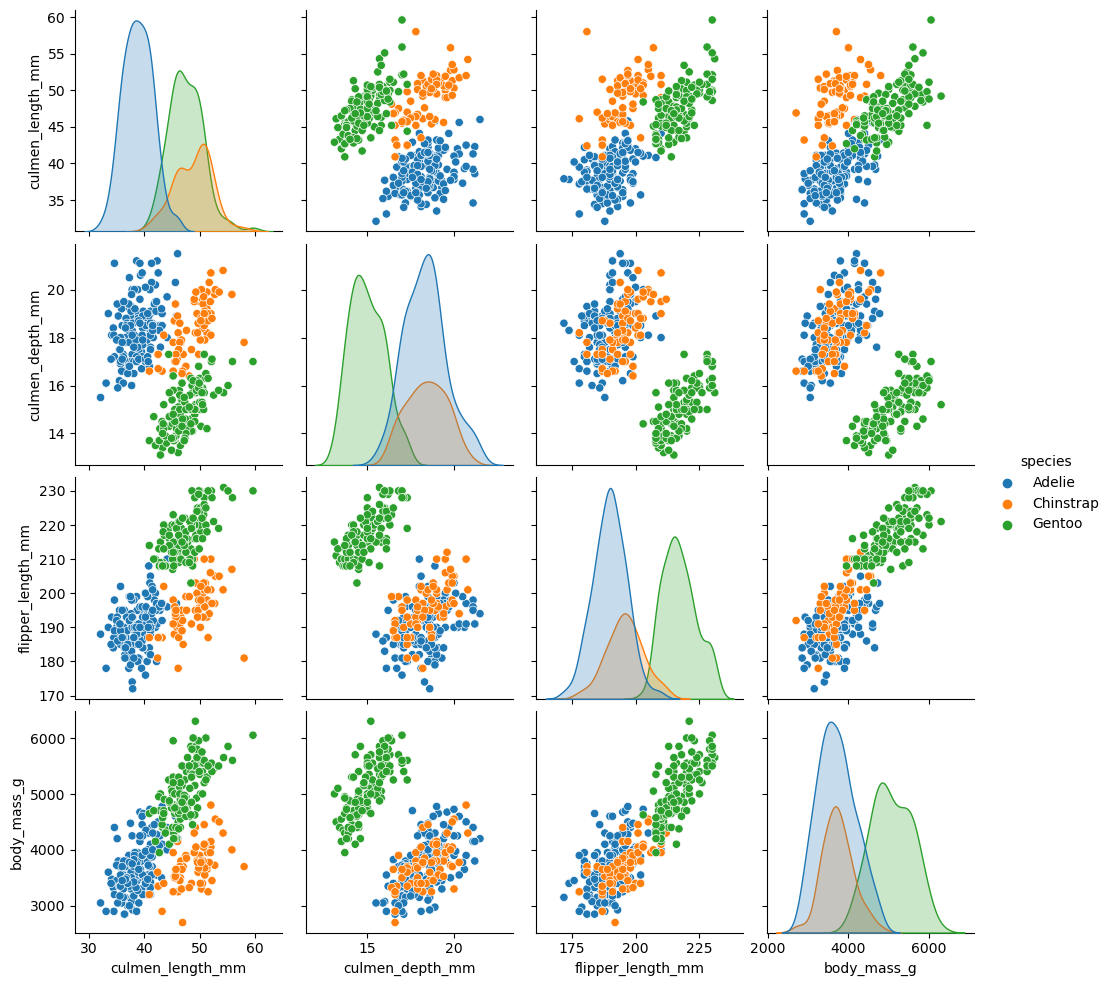

In [35]:
%matplotlib inline
sns.pairplot(df, hue='species')

<AxesSubplot:>

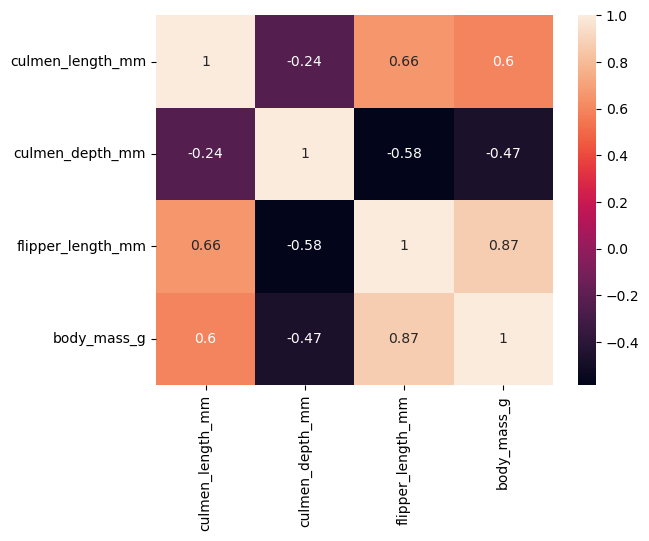

In [36]:
sns.heatmap(df.corr(), annot=True)

In [37]:
# カテゴリごとの個数を計算
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
for cat_col in cat_cols:
    print(f'============{cat_col}============')
    print(df[cat_col].value_counts())

============species============
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
============island============
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
============sex============
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64


In [38]:
# 'sex'の"."のデータをNoneにする
df.loc[df[df['sex'] == '.'].index, 'sex'] = np.nan

In [39]:
df[df['sex'].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [40]:
# 結果を格納するDictionary
results = {}

### 欠損値を落とすケース

In [41]:
# X,ｙ生成
df.dropna(inplace=True)
target = 'species'
X = df.drop(target, axis=1)
y = df[target]

# 前処理
# ダミー変数
X = pd.get_dummies(X, drop_first=True)

# CV
from sklearn.model_selection import RepeatedKFold, cross_val_score
k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_log_loss')

# 結果を格納する
results['drop'] = -np.mean(scores)

In [42]:
scores

array([-0.03089267, -0.03412826, -0.02527852, -0.02184121, -0.04075097,
       -0.0218964 , -0.05902345, -0.03139525, -0.02735785, -0.0194956 ,
       -0.03099878, -0.02624112, -0.02680772, -0.03008682, -0.0301745 ])

In [43]:
results

{'drop': 0.03042460817599788}

### カテゴリカラムの欠損を新カテゴリとする and 数値カラムを中央値で代入するケース

欠損を新カテゴリにしたり、数値カラムを中央値にしたりする代入は、Pipelineに組み込むことが多い

In [44]:
df = pd.read_csv('penguins_size.csv')
# 'sex'の"."のデータをNoneにする
df.loc[df[df['sex'] == '.'].index, 'sex'] = np.nan
# X,ｙ生成
target = 'species'
X = df.drop(target, axis=1)
y = df[target]

# CV
from sklearn.model_selection import RepeatedKFold, cross_val_score
k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)

# ダミー変数生成クラスを自作(Pipelineに組み込むため)
from sklearn.base import BaseEstimator, TransformerMixin
class GetDummies(BaseEstimator, TransformerMixin):
    """
    BaseEstimatorとTransformMininクラスを継承した
    ダミー変数のカラムを作るクラス
    """
    
    def __init__(self):
        self.columns = None
        
    def fit(self, X, y=None):
        self.columns = pd.get_dummies(X).columns
        return self
    
    def transform(self, X):
        X_new = pd.get_dummies(X)
        return X_new.reindex(columns=self.columns, fill_value=0)

# Columns Transformer (imputer)
# カテゴリカラム:NaNに、数値カラム:中央値に
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
num_cols = X.select_dtypes(include=np.number).columns.to_list()
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
ct = ColumnTransformer([('imputer_cat', SimpleImputer(strategy='constant', fill_value='NaN'), cat_cols),
                   ('imputer_num', SimpleImputer(strategy='median'), num_cols)])
# デフォルトだとColumnTransformerの結果がNumPyArrayになるが，後続処理で問題になることがあるのでDataFrameにする
ct.set_output(transform='pandas')

# Pipeline (scaler + model)
pipeline = Pipeline(steps=[('ct', ct), 
                           ('dummy', GetDummies()), 
                           ('scaler', StandardScaler()),
                           ('model', LogisticRegression())])
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_log_loss')

# 結果を格納する
results['median'] = -np.mean(scores)

In [45]:
pipeline

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('imputer_cat',
                                                  SimpleImputer(fill_value='NaN',
                                                                strategy='constant'),
                                                  ['island', 'sex']),
                                                 ('imputer_num',
                                                  SimpleImputer(strategy='median'),
                                                  ['culmen_length_mm',
                                                   'culmen_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g'])])),
                ('dummy', GetDummies()), ('scaler', StandardScaler()),
                ('model', LogisticRegression())])

In [46]:
X_ct = ct.fit_transform(X)

In [47]:
X_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   imputer_cat__island             344 non-null    object 
 1   imputer_cat__sex                344 non-null    object 
 2   imputer_num__culmen_length_mm   344 non-null    float64
 3   imputer_num__culmen_depth_mm    344 non-null    float64
 4   imputer_num__flipper_length_mm  344 non-null    float64
 5   imputer_num__body_mass_g        344 non-null    float64
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


In [48]:
# ダミー変数生成クラスを自作(Pipelineに組み込むため)
from sklearn.base import BaseEstimator, TransformerMixin
class GetDummies(BaseEstimator, TransformerMixin):
    """
    BaseEstimatorとTransformMininクラスを継承した
    ダミー変数のカラムを作るクラス
    """
    
    def __init__(self):
        self.columns = None
        
    def fit(self, X, y=None):
        self.columns = pd.get_dummies(X).columns
        return self
    
    def transform(self, X):
        X_new = pd.get_dummies(X)
        return X_new.reindex(columns=self.columns, fill_value=0)

In [49]:
gd = GetDummies()
gd.fit(X)
gd.transform(X)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,NaN,NaN,NaN,NaN,0,0,1,0,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,1,0,0,0,0
340,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [50]:
# loglossは低いほど精度高いので、medianでは少し精度が落ちた
results

{'drop': 0.03042460817599788, 'median': 0.032384458995518776}

### カテゴリカラムは最頻値 and 数値カラムはkNNで予測するケース

In [51]:
df = pd.read_csv('penguins_size.csv')
# 'sex'の"."のデータをNoneにする
df.loc[df[df['sex'] == '.'].index, 'sex'] = np.nan
# X,ｙ生成
target = 'species'
X = df.drop(target, axis=1)
y = df[target]

# CV
from sklearn.model_selection import RepeatedKFold, cross_val_score
k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)

# ダミー変数生成クラスを自作(Pipelineに組み込むため)
from sklearn.base import BaseEstimator, TransformerMixin
class GetDummies(BaseEstimator, TransformerMixin):
    """
    BaseEstimatorとTransformMininクラスを継承した
    ダミー変数のカラムを作るクラス
    """
    
    def __init__(self):
        self.columns = None
        
    def fit(self, X, y=None):
        self.columns = pd.get_dummies(X).columns
        return self
    
    def transform(self, X):
        X_new = pd.get_dummies(X)
        return X_new.reindex(columns=self.columns, fill_value=0)

# Columns Transformer (imputer)
# カテゴリカラム:最頻値に、数値カラム:KNN予測
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
# sklearn.compose.make_column_selectorを使えば、数値カラムとカテゴリカラムを下記のように書くことができる
# num_cols = X.select_dtypes(include=np.number).columns.to_list()
# cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
num_cols = make_column_selector(dtype_include=np.number)
cat_cols = make_column_selector(dtype_exclude=np.number)
# KNNImputerを実施する際には、標準化をする必要がある。そのため、Pipelineの中にStandardScaler()を組み込む
# PipelineにStandardScalerを組み込む際、'scaler'と'impute_num'は別々に実行されてしまう（'scaler' → 'impute_num' の順番で実行しているわけではない）
# そのため、tipsとしては、'scaler'と'impute_num'を順に実行するpipelineをもう一つ作る。ここではnum_piplineとして作成。
num_pipeline = Pipeline([('scaler', StandardScaler()), 
                         ('imputer_num', KNNImputer(n_neighbors=3))])
ct = ColumnTransformer([('imputer_cat', SimpleImputer(strategy='most_frequent'), cat_cols),
                        ('scaler+imputer_num', num_pipeline, num_cols)])
# デフォルトだとColumnTransformerの結果がNumPyArrayになるが，後続処理で問題になることがあるのでDataFrameにする
ct.set_output(transform='pandas')

# Pipeline (scaler + model)
pipeline = Pipeline(steps=[('ct', ct), 
                           ('dummy', GetDummies()), 
                           ('scaler', StandardScaler()),
                           ('model', LogisticRegression())])
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_log_loss')

# 結果を格納する
results['knn'] = -np.mean(scores)
results

{'drop': 0.03042460817599788,
 'median': 0.032384458995518776,
 'knn': 0.03175495022800063}

In [52]:
# 間違い
ct = ColumnTransformer([('imputer_cat', SimpleImputer(strategy='most_frequent'), cat_cols),
                        ('scaler', StandardScaler(), num_cols),
                        ('imputer_num', KNNImputer(n_neighbors=3), num_cols)])
ct.set_output(transform='pandas')
ct

ColumnTransformer(transformers=[('imputer_cat',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86981faa90>),
                                ('scaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86981fa7c0>),
                                ('imputer_num', KNNImputer(n_neighbors=3),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86981fa7c0>)])

In [53]:
ct.fit_transform(X)

,imputer_cat__island,imputer_cat__sex,scaler__culmen_length_mm,scaler__culmen_depth_mm,scaler__flipper_length_mm,scaler__body_mass_g,imputer_num__culmen_length_mm,imputer_num__culmen_depth_mm,imputer_num__flipper_length_mm,imputer_num__body_mass_g
0,Torgersen,MALE,-0.884499,0.785449,-1.418347,-0.564142,39.10000,18.70000,181.000000,3750.000000
1,Torgersen,FEMALE,-0.811126,0.126188,-1.062250,-0.501703,39.50000,17.40000,186.000000,3800.000000
2,Torgersen,FEMALE,-0.664380,0.430462,-0.421277,-1.188532,40.30000,18.00000,195.000000,3250.000000
3,Torgersen,MALE,NaN,NaN,NaN,NaN,43.92193,17.15117,200.915205,4201.754386
4,Torgersen,FEMALE,-1.324737,1.089724,-0.563715,-0.938776,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...,...,...,...,...,...,...
339,Biscoe,MALE,NaN,NaN,NaN,NaN,43.92193,17.15117,200.915205,4201.754386
340,Biscoe,FEMALE,0.527932,-1.445897,1.003109,0.809516,46.80000,14.30000,215.000000,4850.000000
341,Biscoe,MALE,1.188289,-0.735923,1.501644,1.933419,50.40000,15.70000,222.000000,5750.000000
342,Biscoe,FEMALE,0.234440,-1.192335,0.789451,1.246590,45.20000,14.80000,212.000000,5200.000000


In [54]:
# 正解
num_pipeline = Pipeline([('scaler', StandardScaler()), 
                         ('imputer_num', KNNImputer(n_neighbors=3))])
ct = ColumnTransformer([('imputer_cat', SimpleImputer(strategy='most_frequent'), cat_cols),
                        ('scaler+imputer_num', num_pipeline, num_cols)])
ct.set_output(transform='pandas')
ct

ColumnTransformer(transformers=[('imputer_cat',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86981faa90>),
                                ('scaler+imputer_num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer_num',
                                                  KNNImputer(n_neighbors=3))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86981fa7c0>)])

In [55]:
ct.fit_transform(X)

,imputer_cat__island,imputer_cat__sex,scaler+imputer_num__culmen_length_mm,scaler+imputer_num__culmen_depth_mm,scaler+imputer_num__flipper_length_mm,scaler+imputer_num__body_mass_g
0,Torgersen,MALE,-8.844987e-01,7.854492e-01,-1.418347e+00,-5.641421e-01
1,Torgersen,FEMALE,-8.111257e-01,1.261879e-01,-1.062250e+00,-5.017031e-01
2,Torgersen,FEMALE,-6.643797e-01,4.304624e-01,-4.212767e-01,-1.188532e+00
3,Torgersen,MALE,8.310441e-17,-1.412775e-15,-8.310441e-16,4.155221e-17
4,Torgersen,FEMALE,-1.324737e+00,1.089724e+00,-5.637152e-01,-9.387762e-01
...,...,...,...,...,...,...
339,Biscoe,MALE,8.310441e-17,-1.412775e-15,-8.310441e-16,4.155221e-17
340,Biscoe,FEMALE,5.279317e-01,-1.445897e+00,1.003109e+00,8.095165e-01
341,Biscoe,MALE,1.188289e+00,-7.359231e-01,1.501644e+00,1.933419e+00
342,Biscoe,FEMALE,2.344396e-01,-1.192335e+00,7.894512e-01,1.246590e+00


In [56]:
# sklearn.compose.make_column_selectorを使えば、数値カラムとカテゴリカラムを下記のように書くことができる
# num_cols = X.select_dtypes(include=np.number).columns.to_list()
# cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
num_cols = make_column_selector(dtype_include=np.number)
cat_cols = make_column_selector(dtype_exclude=np.number)

## エンコーディング

### Label Encoding

label encoding
- sklearn.preprocessing.OrdinalEncoding
    - 他のpreprocessingと同様
    - .fit()と.transform()で変換
    - デフォルトではNumPyArrayで返ってくる
        - .set_output(transform="pandas")

In [57]:
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('penguins_size.csv')

oe = OrdinalEncoder()
oe.set_output(transform='pandas')
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
df[cat_cols] = oe.fit_transform(df[cat_cols])

In [58]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.1,18.7,181.0,3750.0,2.0
1,0.0,2.0,39.5,17.4,186.0,3800.0,1.0
2,0.0,2.0,40.3,18.0,195.0,3250.0,1.0
3,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,0.0,2.0,36.7,19.3,193.0,3450.0,1.0
...,...,...,...,...,...,...,...
339,2.0,0.0,NaN,NaN,NaN,NaN,NaN
340,2.0,0.0,46.8,14.3,215.0,4850.0,1.0
341,2.0,0.0,50.4,15.7,222.0,5750.0,2.0
342,2.0,0.0,45.2,14.8,212.0,5200.0,1.0


### Target Encoding

target encoding
- category_encodersパッケージを使用
    - pip install category_encodersでインストール
- categroy_encoders.TargetEncoders()クラス
    - インスタンス生成
    - .fit(X,y)
    .transform(X)
- .fitの際にテストデータを含まないように注意

In [59]:
from category_encoders import TargetEncoder
import seaborn as sns

df = sns.load_dataset('titanic')
df.dropna(inplace=True)
df['adult_male'] = df['adult_male'].astype('object')

In [60]:
encoder = TargetEncoder()
encoder.fit(df, df['survived'])
df = encoder.transform(df)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0.931533,38.0,1,0,71.2833,0.737773,0.675159,0.950662,0.936698,0.592011,0.737773,0.999989,False
3,1,1,0.931533,35.0,1,0,53.1000,0.643481,0.675159,0.950662,0.936698,0.592011,0.643481,0.999989,False
6,0,1,0.436317,54.0,0,0,51.8625,0.643481,0.675159,0.391155,0.391155,0.717867,0.643481,0.013409,True
10,1,3,0.931533,4.0,1,1,16.7000,0.643481,0.628538,0.732342,0.936698,0.646289,0.643481,0.999989,False
11,1,1,0.931533,58.0,0,0,26.5500,0.643481,0.675159,0.950662,0.936698,0.592011,0.643481,0.999989,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,0.931533,47.0,1,1,52.5542,0.643481,0.675159,0.950662,0.936698,0.725425,0.643481,0.999989,False
872,0,1,0.436317,33.0,0,0,5.0000,0.643481,0.675159,0.391155,0.391155,0.737957,0.643481,0.013409,True
879,1,1,0.931533,56.0,0,1,83.1583,0.737773,0.675159,0.950662,0.936698,0.592011,0.737773,0.999989,False
887,1,1,0.931533,19.0,0,0,30.0000,0.643481,0.675159,0.950662,0.936698,0.737957,0.643481,0.999989,True


In [61]:
# マルチクラスのケース
df = pd.read_csv('penguins_size.csv')
df.loc[df[df['sex']=='.'].index[0], 'sex'] = np.nan

targets = df['species'].unique()
for target in targets:
    target_y = df['species'] == target
    encoder = TargetEncoder()
    df['encoded_island_'+target] = encoder.fit_transform(df['island'], target_y)

In [62]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [63]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [64]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,encoded_island_Adelie,encoded_island_Chinstrap,encoded_island_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.978140,7.742061e-03,0.014118
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0.978140,7.742061e-03,0.014118
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0.978140,7.742061e-03,0.014118
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0.978140,7.742061e-03,0.014118
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0.978140,7.742061e-03,0.014118
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,0.261905,7.385705e-08,0.738095
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0.261905,7.385705e-08,0.738095
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0.261905,7.385705e-08,0.738095
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0.261905,7.385705e-08,0.738095


### target encosdingとone-hot encodingを比較する

- titanicのデータを使用
- 5foldCV x 3
- 欠損値代入
    - カテゴリ: 最頻値
    - 数値: 中央値
- 標準化
- target encodingとone-hot encoｄingで精度比較
- target encodingやone-hot encodingはpipelineの中に組み込んでcross-validationを回すこと
    - 全データに対して、target encodingするのはNG
    - あくまで学習データとテストデータを分割してからエンコーディングを実施する
- モデルはロジスティック回帰
- 評価指標はなんでもOK（講座ではAccuracyを使用）

In [65]:
df = sns.load_dataset('titanic')
df.drop('alive', axis=1,inplace=True)

# adult_maleとaloneがboolになっているのでcategoryにする
df[['adult_male', 'alone']] = df[['adult_male', 'alone']].astype('object')

# X, y生成
X = df.drop('survived', axis=1)
y = df['survived']

In [66]:
# 結果を格納するDict
scores = {}

# 欠損値代入:数値->中央値、カテゴリ->最頻値
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
num_cols = X.select_dtypes(include=np.number).columns.to_list()
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()

# remainder='passthrough'でTransformした他のカラムをdropしないようにする
# ColumnTransformerは、デフォルトではtransformしたカラム以外はdropしてしまうので注意！
ct = ColumnTransformer([('num_imputer', num_imputer, num_cols),
                        ('cat_imputer', cat_imputer, cat_cols)], 
                        remainder='passthrough')  # remainder='passthrough'でTransformした他のカラムをdropしないようにする
ct.set_output(transform='pandas')

# Pipeline_target: ColumnTransformer->Target Encoding->標準化->model
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pipeline_target = Pipeline([('ct', ct), 
                     ('encoder', TargetEncoder()), 
                     ('scaler', StandardScaler()), 
                     ('model', LogisticRegression())])

# Pipeline_onehot: ColumnTransformer->OnehotEncoding->標準化->model
# one-hot encoder class
from sklearn.base import BaseEstimator, TransformerMixin
class GetDummies(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns = None
        
    def fit(self, X, y):
        self.columns = pd.get_dummies(X).columns
        return self
        
    def transform(self, X):
        X_new = pd.get_dummies(X)
        return X_new.reindex(columns=self.columns, fill_value=0)

pipeline_onehot = Pipeline([('ct', ct), 
                            ('encorder', GetDummies()), 
                            ('scaler', StandardScaler()), 
                            ('model', LogisticRegression())])
        
# 5foldCVx3
from sklearn.model_selection import RepeatedKFold, cross_val_score
k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
scores['target encording'] = cross_val_score(pipeline_target, X, y, cv=cv)
scores['one-hot encoding'] = cross_val_score(pipeline_onehot, X, y, cv=cv)

In [67]:
scores

{'target encording': array([0.83240223, 0.78089888, 0.82022472, 0.84831461, 0.83146067,
        0.79888268, 0.79775281, 0.89325843, 0.79213483, 0.83707865,
        0.82122905, 0.86516854, 0.79213483, 0.81460674, 0.81460674]),
 'one-hot encoding': array([0.83240223, 0.7752809 , 0.81460674, 0.84831461, 0.83146067,
        0.7877095 , 0.81460674, 0.87078652, 0.80337079, 0.81460674,
        0.80446927, 0.85955056, 0.78651685, 0.80898876, 0.8258427 ])}

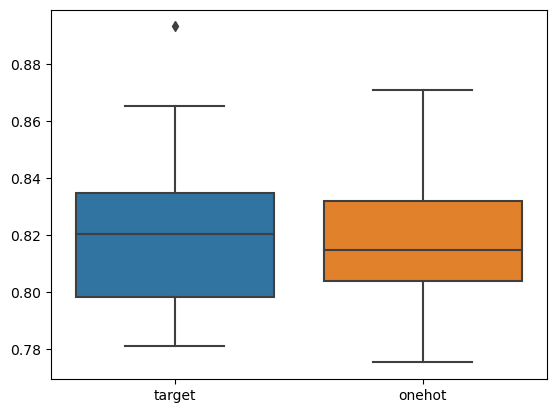

In [68]:
# Boxplotで精度確認
import matplotlib.pyplot as plt
sns.boxplot(data=[scores['target encording'], scores['one-hot encoding']])
plt.xticks([0, 1], ['target', 'onehot'])
plt.show()

In [69]:
# 中央値比較
print(np.median(scores['target encording']))
print(np.median(scores['one-hot encoding']))

# 平均値比較
print(np.mean(scores['target encording']))
print(np.mean(scores['one-hot encoding']))

0.8202247191011236
0.8146067415730337
0.8226769610612432
0.8185675726570837
